# Integrating two scRNA seq data with Seurat (CCA)

## 1. Loading libraries

In [1]:
library(Seurat)
library(SeuratData)
library(ggplot2)
library(pipeR)
library(dplyr)

─ Installed datasets ─────────────────── SeuratData v0.2.1 ─

✔ ifnb 3.0.0                  


─────────────────── Key ───────────────────

✔ Dataset loaded successfully
❯ Dataset built with a newer version of Seurat than installed
❓ Unknown version of Seurat installed



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## 2. Import dataframes

### 入力

In [2]:
#public
public_project <- "GSE121654"
public_sample <- "GSM3442006"
public_data <- read.delim(
  "GSE121654_RAW/GSM3442006_E14_F_B10.dge.txt",
  stringsAsFactor=FALSE,
  row=1,
  header = TRUE)
#private
private_project <- "GSE128855"
private_sample <- "GSM3687213"
private_data <- read.delim(
  "GSE128855_RAW/GSM3687213_countTable_K22_dura_wt.txt",
  stringsAsFactor=FALSE,
  row=1,
  header = TRUE)

## 3. Public data

Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


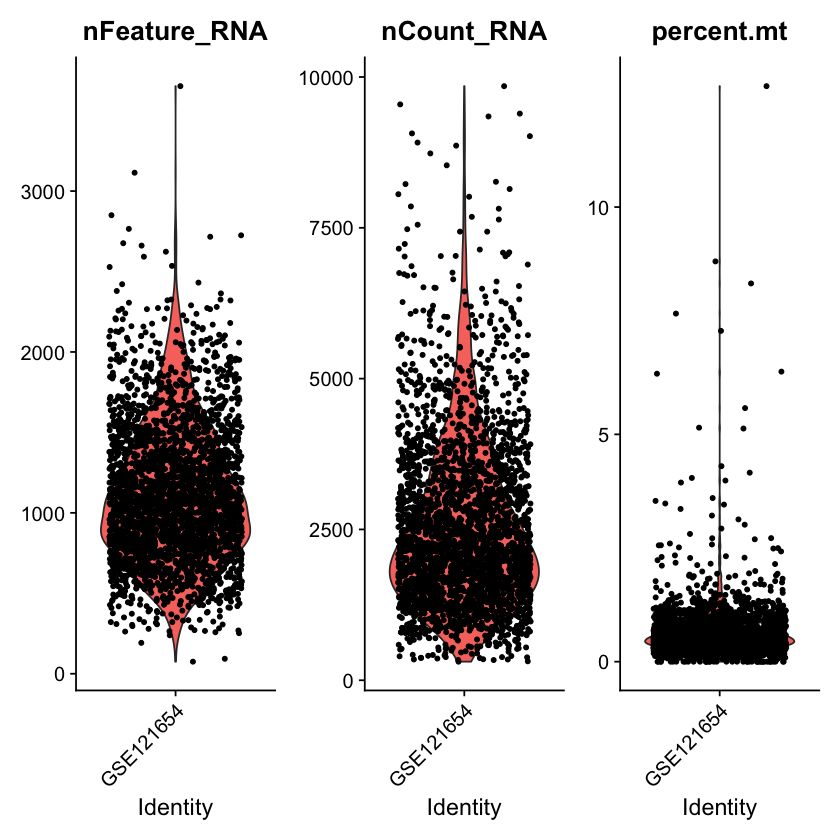

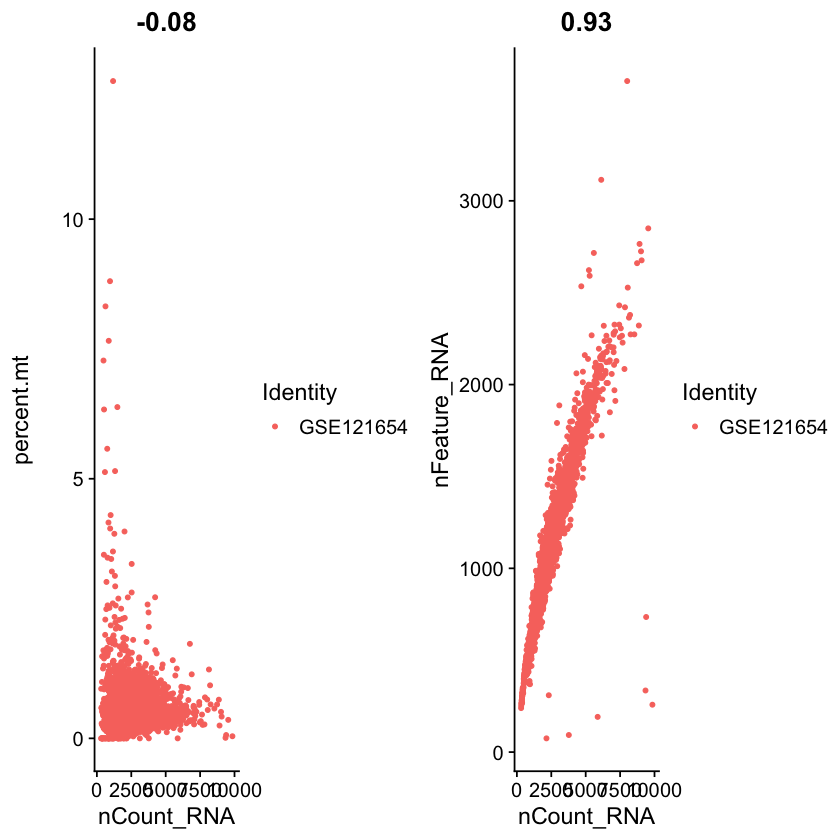

In [3]:
#create seurat objest
public_data_seurat <- CreateSeuratObject(
  public_data,
  project = public_project,
  min.cells = 3
)
public_data_seurat@meta.data$sample <- public_sample

#preprocessing
public_data_seurat[["percent.mt"]] <- PercentageFeatureSet(public_data_seurat, pattern="^mt.")
VlnPlot(public_data_seurat, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
plot1 <- FeatureScatter(public_data_seurat, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(public_data_seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

### 入力

In [4]:
#determining cutoffs
public_nfeature_min <- 10 
public_nfeature_max <- 2500
public_ncount_min <- 0
public_ncount_max <- 6000
public_percentmt_max <- 3

An object of class Seurat 
13422 features across 2632 samples within 1 assay 
Active assay: RNA (13422 features)


Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


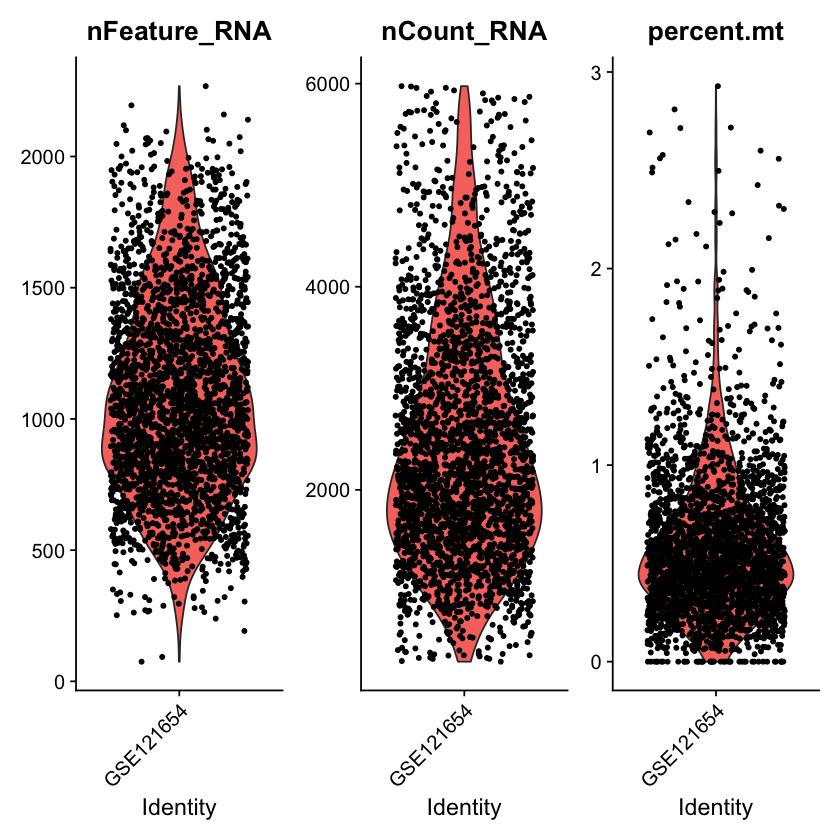

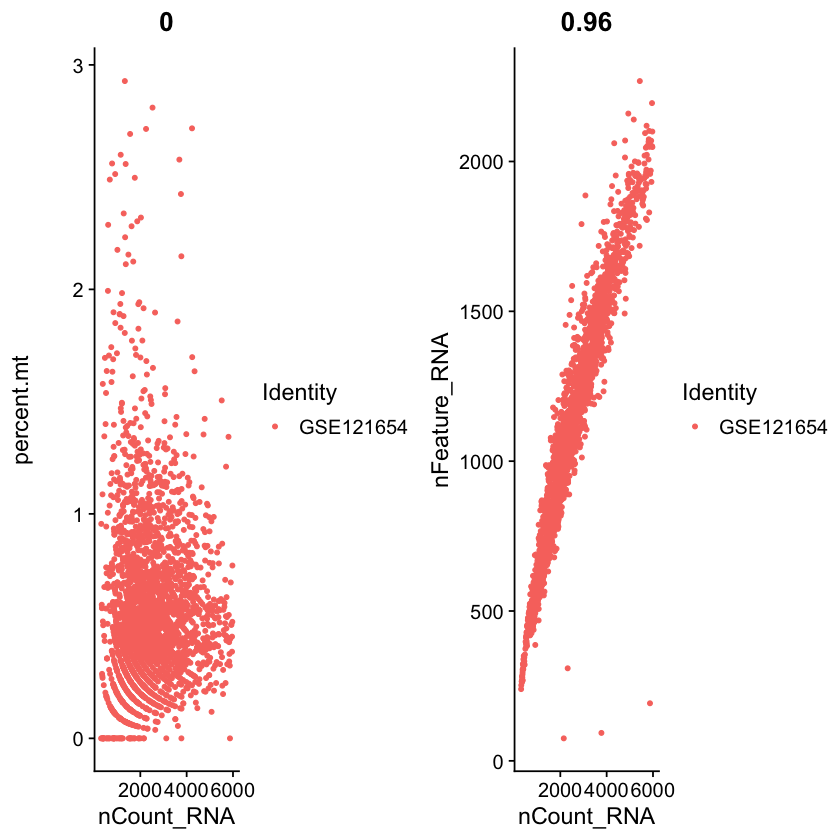

In [5]:
#quality control
public_data_seurat <- subset(
    public_data_seurat,
    subset = nFeature_RNA > public_nfeature_min &
    nFeature_RNA < public_nfeature_max &
    nCount_RNA > public_ncount_min &
    nCount_RNA < public_ncount_max &
    percent.mt < public_percentmt_max)
print(public_data_seurat)
VlnPlot(public_data_seurat, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
plot1 <- FeatureScatter(public_data_seurat, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(public_data_seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

Warning message:
“The following arguments are not used: normalization_method”
Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”
When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


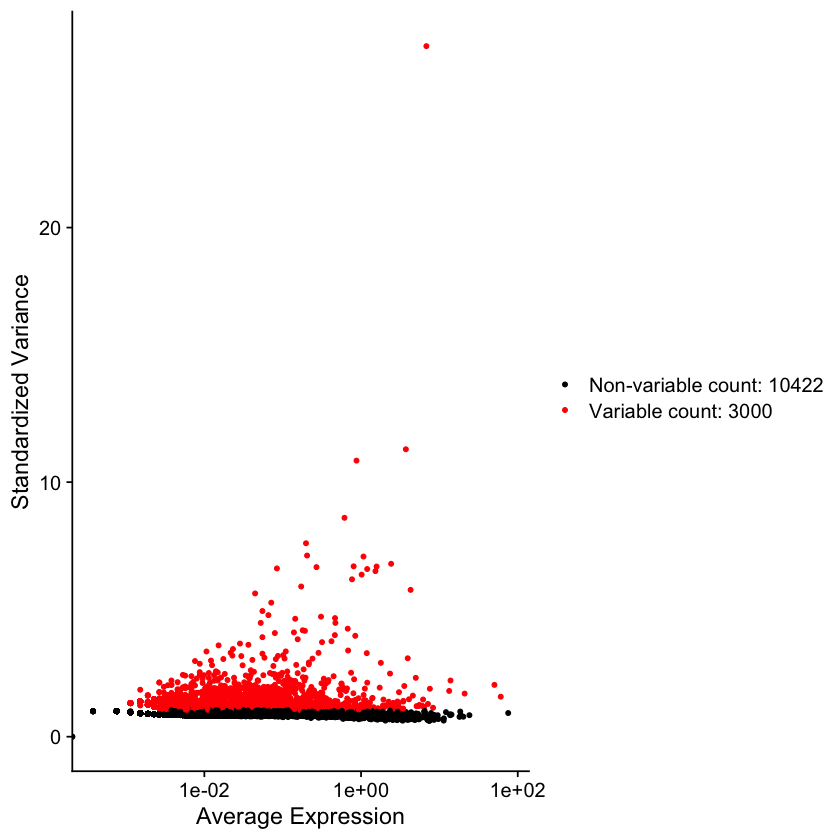

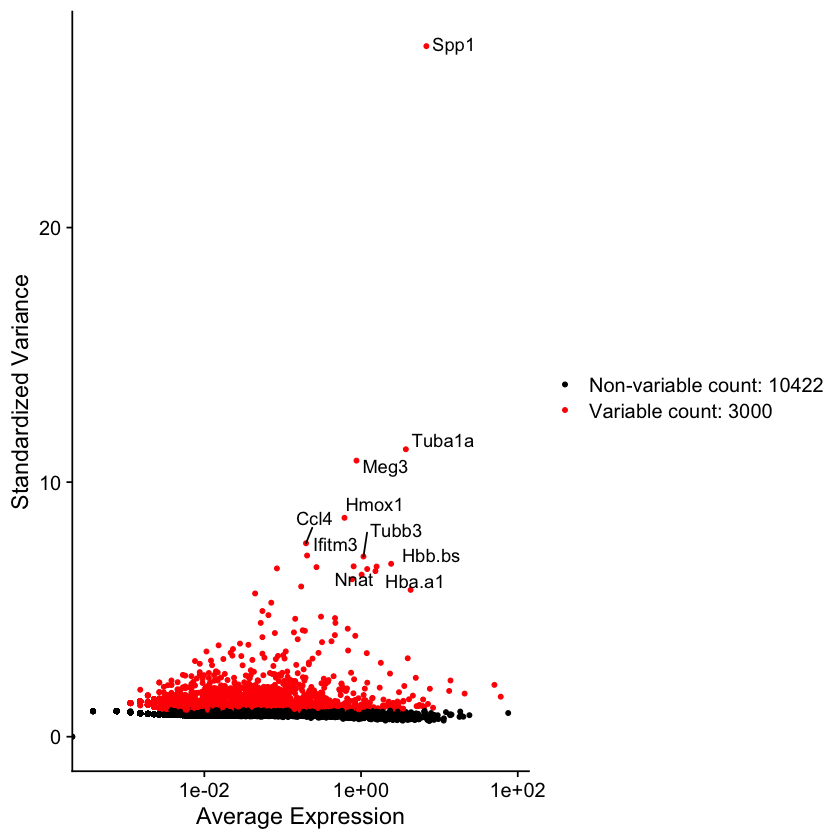

In [6]:
#Normalization
public_data_seurat <- NormalizeData(
  object = public_data_seurat,
  normalization_method = "LogNormalize",
  scale.factor = 10000
)

#identification of highly variable features
public_data_seurat <- FindVariableFeatures(
    public_data_seurat,
    selection.method = "vst",
    nfeatures = 3000)
public_top10 <- head(VariableFeatures(public_data_seurat), 10)

#plot variable features with or without labels
plot1 <- VariableFeaturePlot(public_data_seurat)
plot2 <- LabelPoints(
    plot = plot1, 
    points = public_top10,
    repel = TRUE)
plot1
plot2

Centering and scaling data matrix

PC_ 1 
Positive:  Ctsb, Apoe, Ctsz, Sepp1, Ctsd, Ly86, P2ry12, Ctsl, Cd63, Fth1 
	   Ftl1, Lyz2, Ctsc, Serpine2, Clta, Cd9, Gpx1, Cd68, Sparc, Gpr34 
	   Ctsh, Cd52, Aldoa, Gpx3, Cryba4, Prdx1, Npl, Crybb1, Gm10116, Plin2 
Negative:  Tubb3, Map1b, Nnat, Cd24a, Rtn1, Tuba1a, Tagln3, Sox11, Tubb2b, Igfbpl1 
	   X6330403K07Rik, Nsg1, Stmn3, Mllt11, Dbn1, Bex2, Ttc3, Stmn2, H2afy2, Fez1 
	   Marcksl1, Hist3h2ba, Aplp1, Cnn3, Dpysl3, Elavl3, Rbfox2, Tsc22d1, Meg3, Pfn2 
PC_ 2 
Positive:  Sparc, Sepp1, P2ry12, Tspan13, Trf, Ctsh, Apoe, Meg3, Fcgrt, Ogt 
	   Xist, Tmem176b, Tmem176a, Lrrc25, Pcsk1n, Clec4a3, Pla2g7, AB124611, Ly6h, Ltc4s 
	   H2.DMa, Pid1, Ttr, Lag3, Fcgr1, Hba.a2, PISD, Hbb.bs, Hpgd, Tmem119 
Negative:  X2810417H13Rik, Hmgb2, Birc5, Ube2c, Cks1b, Tuba1b, Cdk1, Pbk, H2afz, Ran 
	   Ccnb1, Ranbp1, H2afx, Cdca8, Spc24, Spc25, Cenpa, Nusap1, Top2a, Rrm2 
	   Smc4, Ccna2, Smc2, Cdca3, Cdkn2c, Ptma, Stmn1, Tubb4b, Aurkb, Aurka 
PC_ 3 
Positive:  

PC_ 1 
Positive:  Ctsb, Apoe, Ctsz, Sepp1, Ctsd 
Negative:  Tubb3, Map1b, Nnat, Cd24a, Rtn1 
PC_ 2 
Positive:  Sparc, Sepp1, P2ry12, Tspan13, Trf 
Negative:  X2810417H13Rik, Hmgb2, Birc5, Ube2c, Cks1b 
PC_ 3 
Positive:  Ftl1, Fabp5, Gm10116, Mif, Nme1 
Negative:  Xist, Top2a, Ube2c, Meg3, Nusap1 
PC_ 4 
Positive:  Cd63, Serpine2, Cd9, Ctsl, Ctsd 
Negative:  Ifitm3, Ccr2, Plac8, F13a1, Anxa1 
PC_ 5 
Positive:  P2ry12, Sox11, Cd24a, Tmem119, Elavl3 
Negative:  Ccr2, Ifitm3, Lgals3, Lgals1, Plac8 


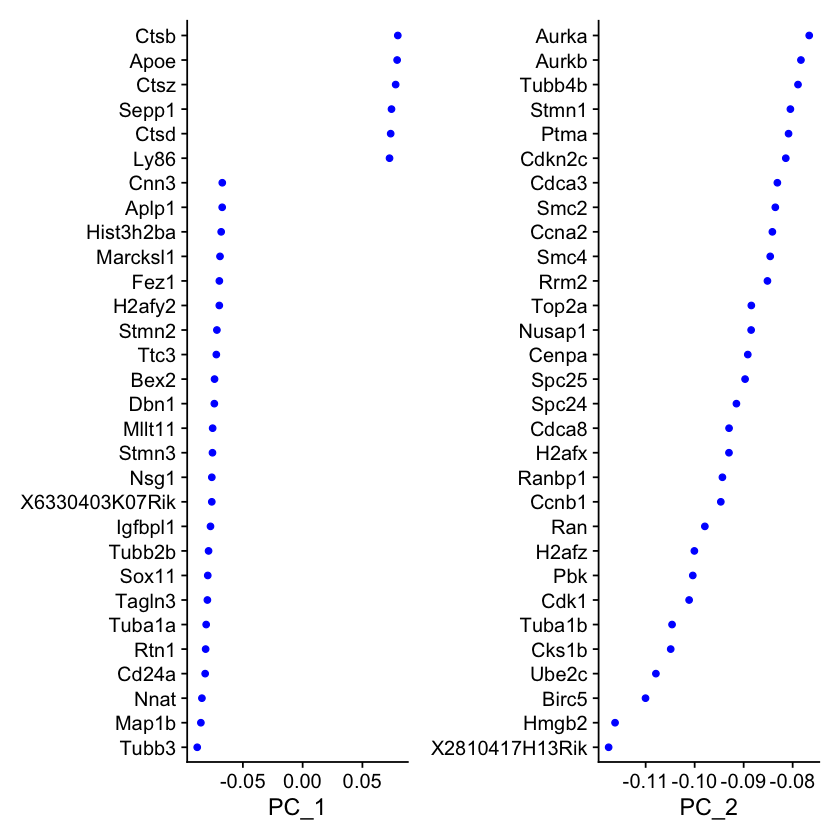

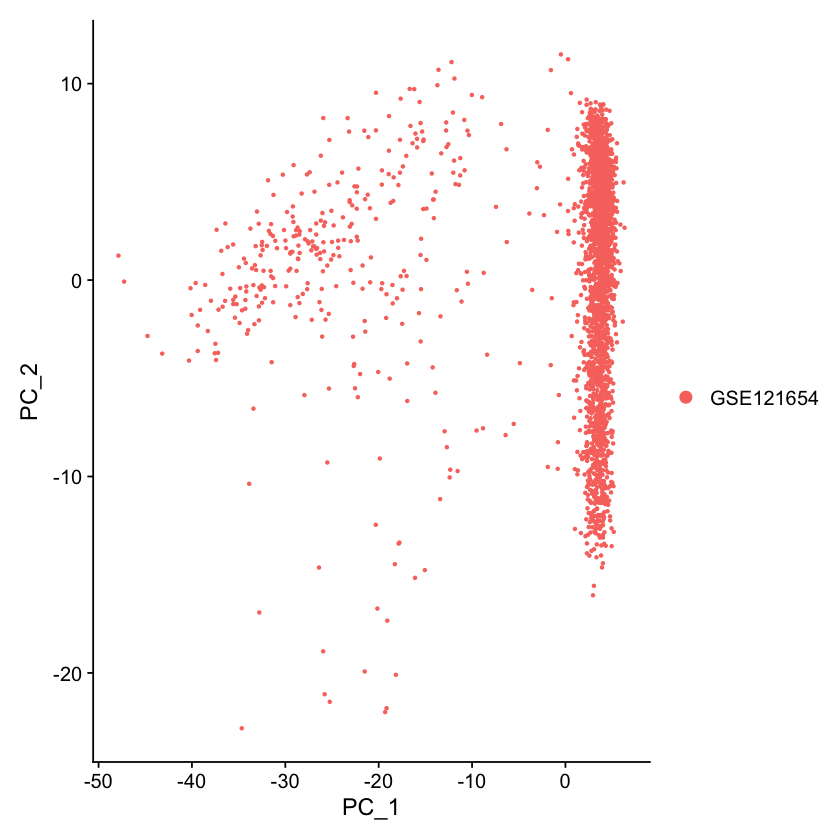

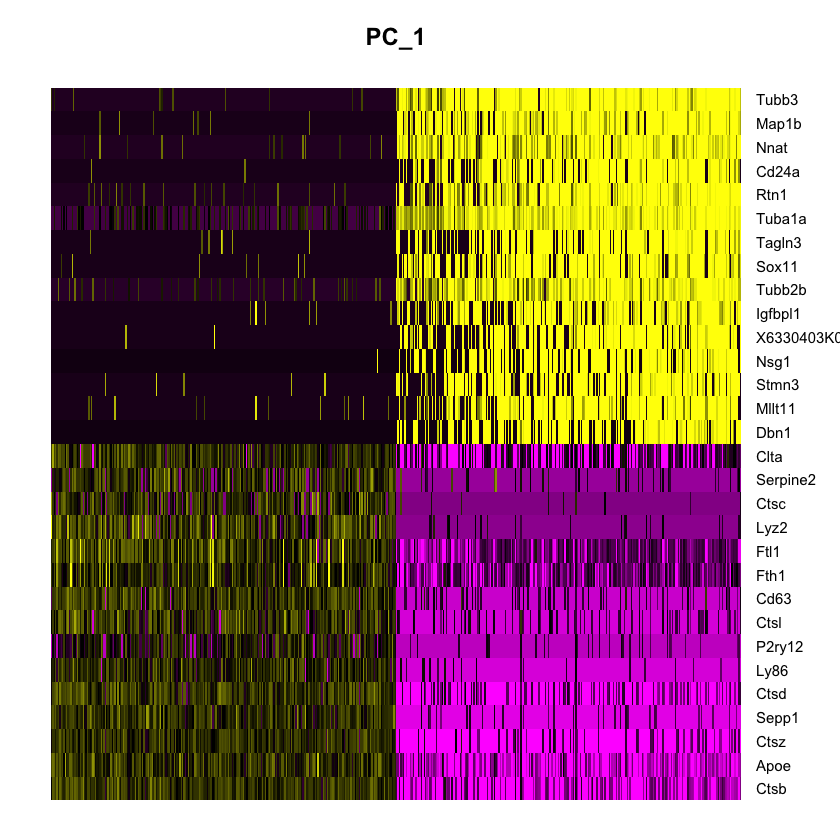

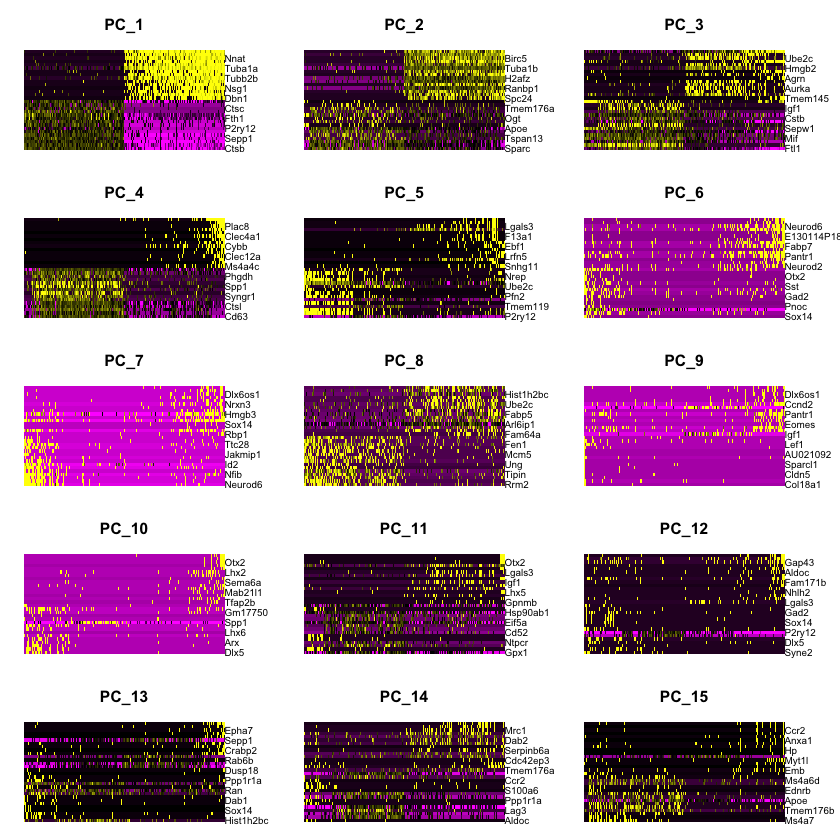

In [7]:
#Scaling data
public_all_genes <- rownames(public_data_seurat)
public_data_seurat <- ScaleData(public_data_seurat, features = public_all_genes)

#perform linear dimentional reduction
public_data_seurat <- RunPCA(public_data_seurat, features = VariableFeatures(object = public_data_seurat))
print(public_data_seurat[["pca"]], dims = 1:5, nfeatures = 5)
VizDimLoadings(public_data_seurat, dims = 1:2, reduction = "pca")
DimPlot(public_data_seurat, reduction = "pca")
DimHeatmap(public_data_seurat, dims = 1, cells = 500, balanced = TRUE)
DimHeatmap(public_data_seurat, dims = 1:15, cells = 500, balanced = TRUE)

Warning message:
“Removed 31611 rows containing missing values (geom_point).”


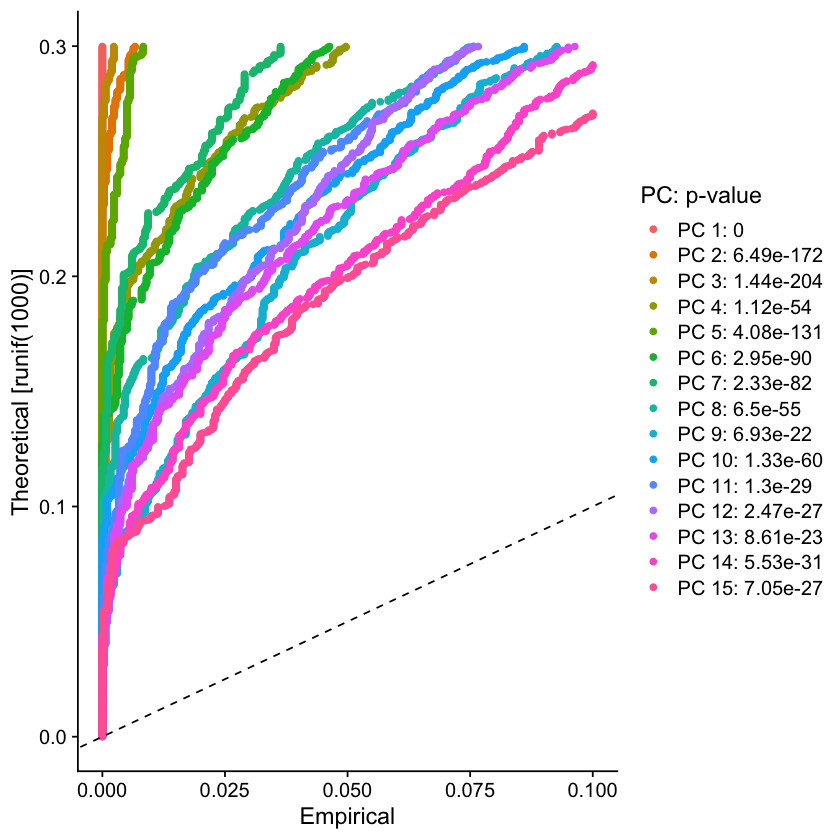

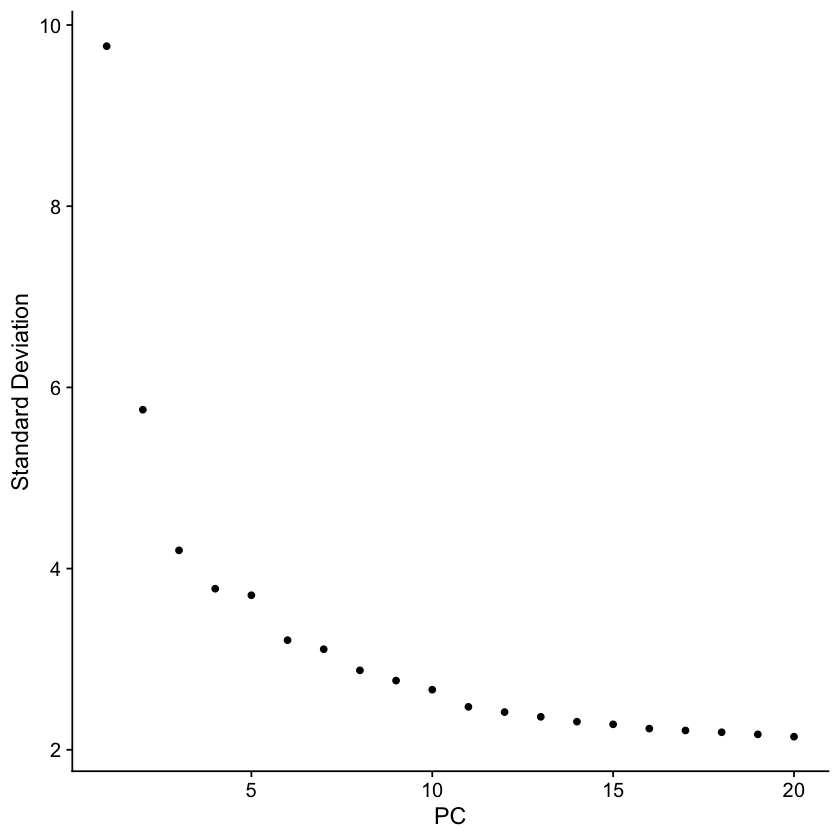

In [8]:
#determine the dimentionality of the  dataset  #takes time
public_data_seurat <- JackStraw(public_data_seurat, num.replicate = 100)
public_data_seurat <- ScoreJackStraw(public_data_seurat, dims = 1:20)
JackStrawPlot(public_data_seurat, dims = 1:15)
ElbowPlot(public_data_seurat)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2632
Number of edges: 85222

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8419
Number of communities: 9
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
17:48:59 UMAP embedding parameters a = 0.9922 b = 1.112

17:48:59 Read 2632 rows and found 10 numeric columns

17:48:59 Using Annoy for neighbor search, n_neighbors = 30

17:48:59 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

17:49:00 Writing NN index file to temp file /var/folders/q1/mmywyq3j2jb7dt3z_ttjz7t80000gn/T//RtmprXgEfF/file13a1e3b99d186

17:49:00 Searching Annoy index using 1 thread, search_k = 3000

17:49:01 Annoy recall = 100%

17:49:01 Commencing smooth kNN distance calibr

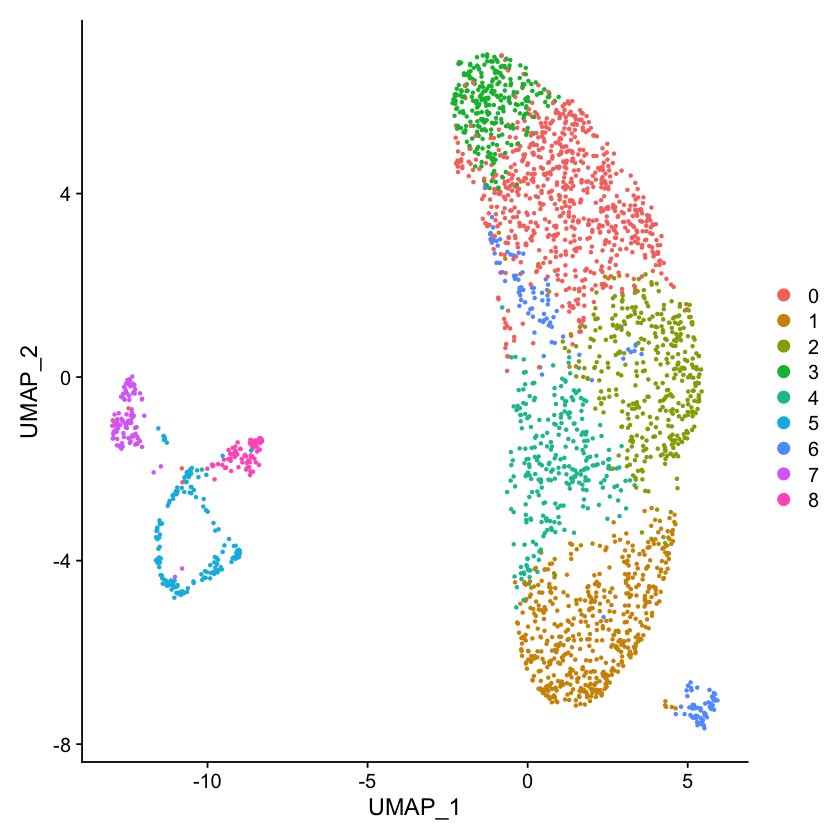

In [9]:
#Cluster the cells
public_data_seurat  <- FindNeighbors(public_data_seurat, dims = 1:10)
public_data_seurat  <- FindClusters(public_data_seurat, resolution = 0.5)

#Run non-linear dimentional reduction (UMAP)
public_data_seurat <- RunUMAP(public_data_seurat, dims = 1:10)
DimPlot(public_data_seurat, reduction = "umap")

In [10]:
#Find differentially expressed features (cluster biomarkers)
public_data_seurat_markers <- FindAllMarkers(public_data_seurat, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
public_top2 <- public_data_seurat_markers %>>%
group_by(cluster) %>>%
top_n(n = 2, wt = avg_logFC)
public_top2

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8



p_val         avg_logFC pct.1 pct.2 p_val_adj     cluster gene          
1   6.607667e-55 0.5135917 0.893 0.672  8.868810e-51 0       Sparc         
2   2.570026e-22 0.4951201 0.528 0.379  3.449489e-18 0       AF251705      
3  1.327315e-259 1.5794422 0.845 0.122 1.781523e-255 1       Birc5         
4  3.989441e-241 1.7555074 0.744 0.095 5.354628e-237 1       Ube2c         
5   4.206064e-66 1.3145657 0.675 0.260  5.645379e-62 2       Fabp5         
6   8.524449e-61 2.1901772 0.575 0.210  1.144152e-56 2       Spp1          
7   1.082153e-61 0.8350566 0.975 0.821  1.452466e-57 3       P2ry12        
8   3.841813e-45 0.9122831 0.866 0.716  5.156481e-41 3       Sparc         
9  7.662664e-114 1.2001420 0.612 0.101 1.028483e-109 4       Rrm2          
10  3.331196e-81 1.2039242 0.743 0.234  4.471132e-77 4       X2810417H13Rik
11 4.144776e-147 2.4136856 0.911 0.143 5.563119e-143 5       Nnat          
12 5.629131e-142 2.4482831 0.885 0.140 7.555420e-138 5       Tubb3         
13 8.636180e-104 2.1006323 0.435 0.029  1.159148e-99 6       Ifitm3        
14  3.732415e-92 1.7862468 0.826 0.176  5.009647e-88 6       Ms4a6c        
15 1.085129e-148 4.2277777 0.978 0.115 1.456460e-144 7       Meg3          
16  9.109002e-61 2.8957104 1.000 0.742  1.222610e-56 7       Xist          
17 7.947370e-264 3.1671108 0.947 0.030 1.066696e-259 8       Neurod6       
18 2.019330e-117 2.5661140 0.920 0.096 2.710345e-113 8       Sox11

### 入力

In [11]:
public_Cluster_FocusOn <- 1

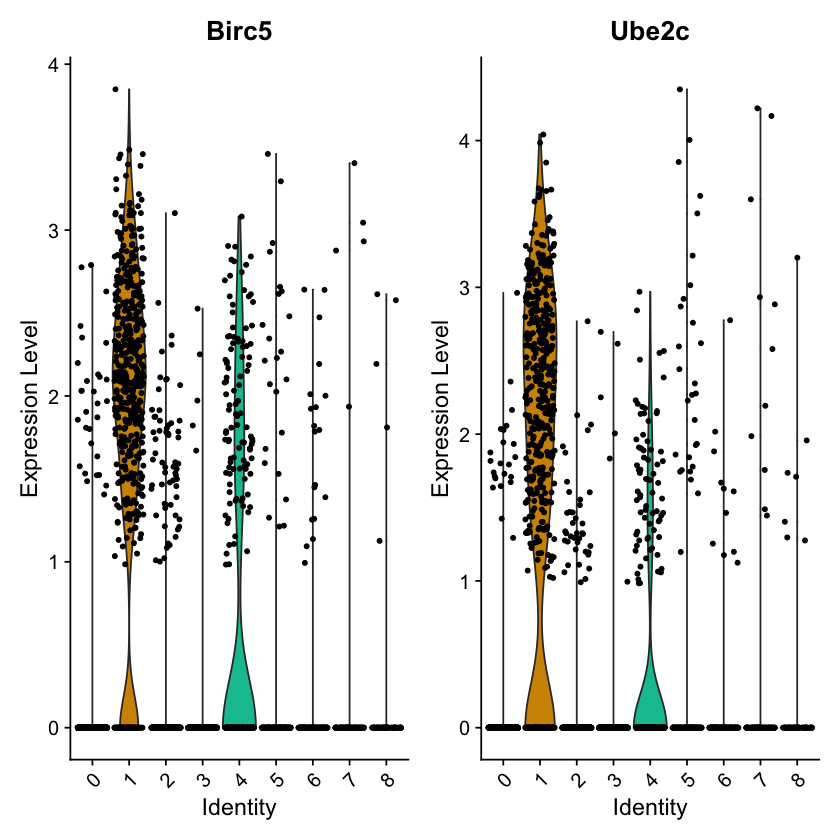

In [12]:
VlnPlot(public_data_seurat, features = subset(public_top2, cluster == public_Cluster_FocusOn)$gene)

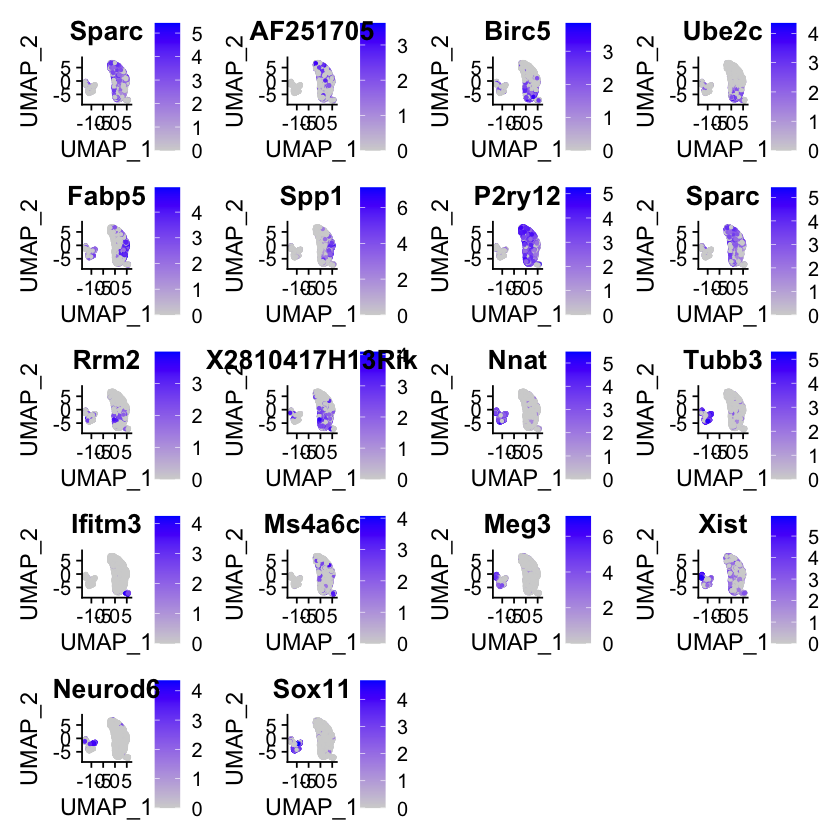

In [13]:
#feature plot for each marker
FeaturePlot(public_data_seurat, features = public_top2$gene)

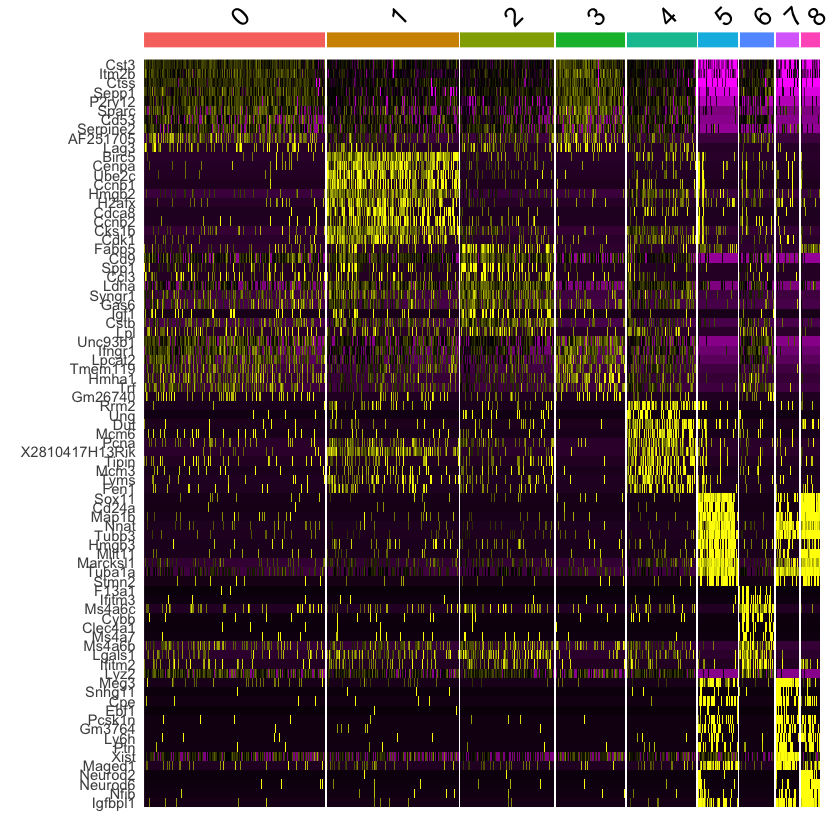

In [14]:
#Heatmaps for featured genes
public_top10 <- public_data_seurat_markers %>>%
group_by(cluster) %>>%
top_n(n = 10, wt = avg_logFC)
DoHeatmap(public_data_seurat, features = public_top10$gene) + NoLegend()

## 4. Private data

Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


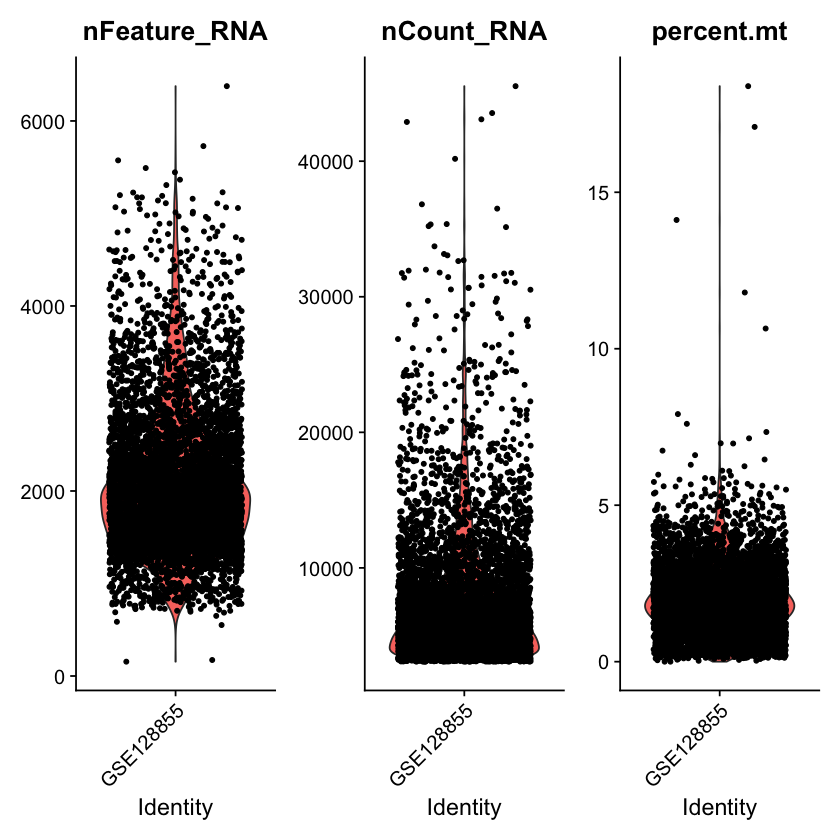

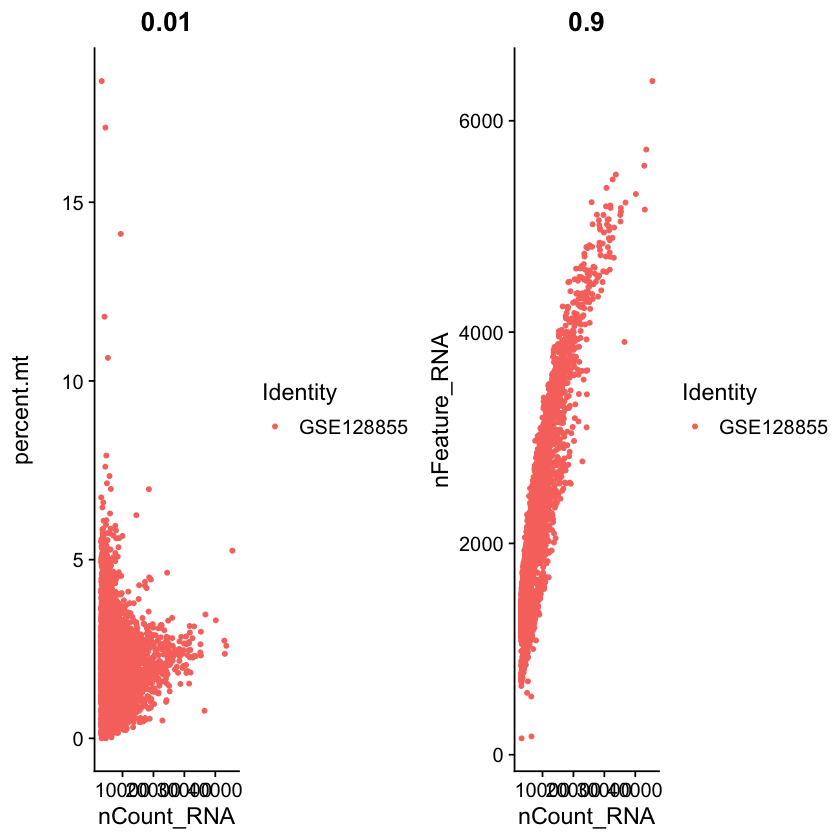

In [15]:
#create seurat objest
private_data_seurat <- CreateSeuratObject(
  private_data,
  project = private_project,
  min.cells = 3
)
private_data_seurat@meta.data$sample <- private_sample

#preprocessing
private_data_seurat[["percent.mt"]] <- PercentageFeatureSet(private_data_seurat, pattern="^mt.")
VlnPlot(private_data_seurat, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
plot1 <- FeatureScatter(private_data_seurat, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(private_data_seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

### 入力

In [16]:
#determining cutoffs
private_nfeature_min <- 500 
private_nfeature_max <- 4500
private_ncount_min <- 0
private_ncount_max <- 30000
private_percentmt_max <- 5

An object of class Seurat 
15936 features across 5744 samples within 1 assay 
Active assay: RNA (15936 features)


Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


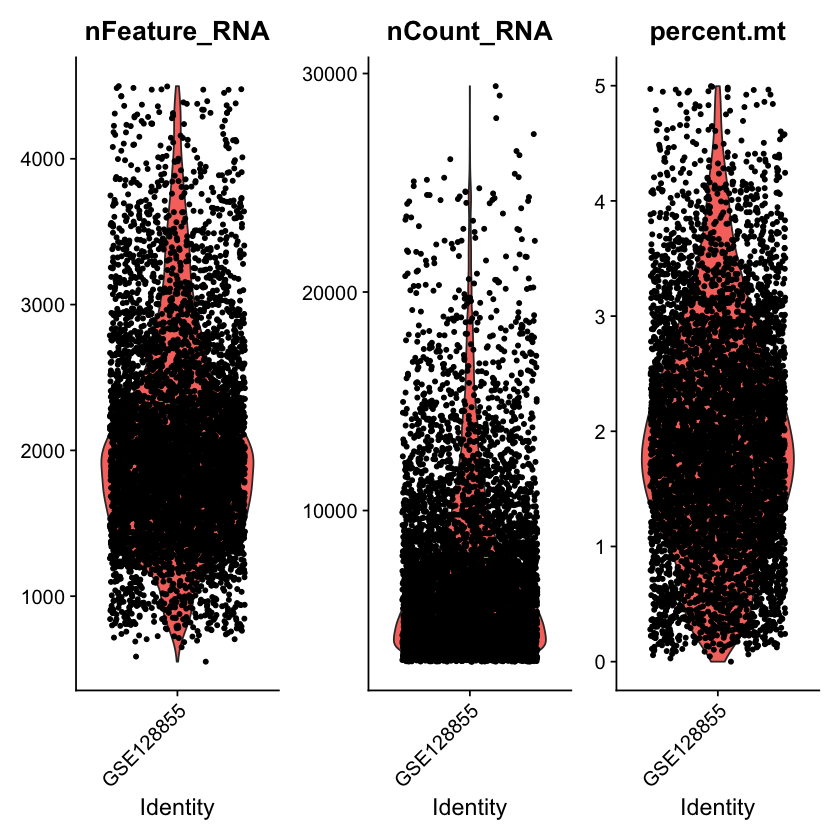

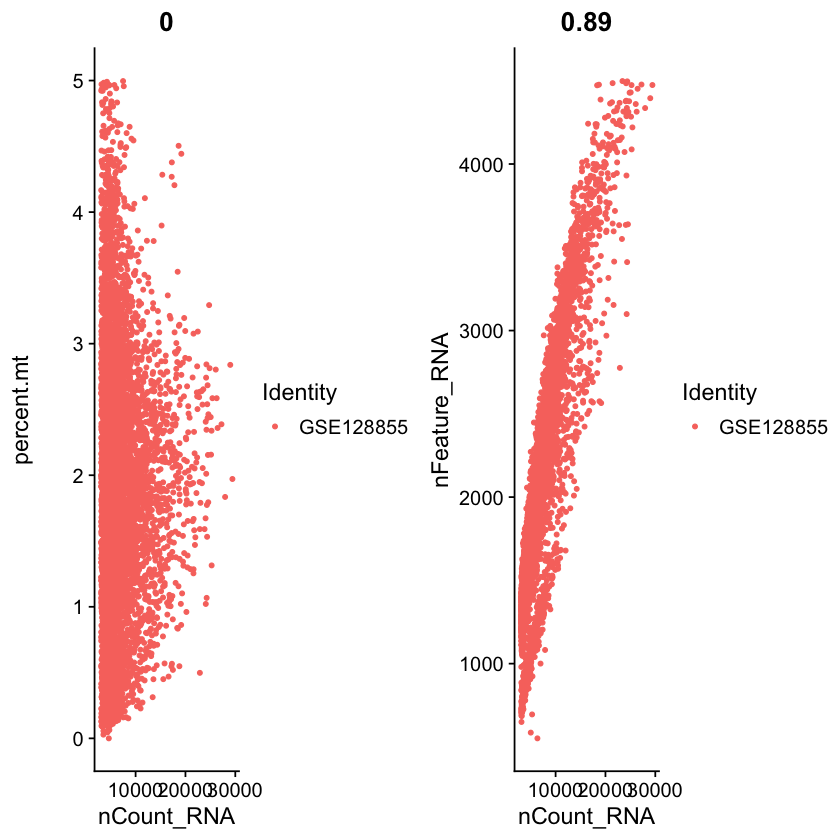

In [17]:
#quality control
private_data_seurat <- subset(
    private_data_seurat,
    subset = nFeature_RNA > private_nfeature_min &
    nFeature_RNA < private_nfeature_max &
    nCount_RNA > private_ncount_min &
    nCount_RNA < private_ncount_max &
    percent.mt < private_percentmt_max)
print(private_data_seurat)
VlnPlot(private_data_seurat, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
plot1 <- FeatureScatter(private_data_seurat, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(private_data_seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

Warning message:
“The following arguments are not used: normalization_method”
When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


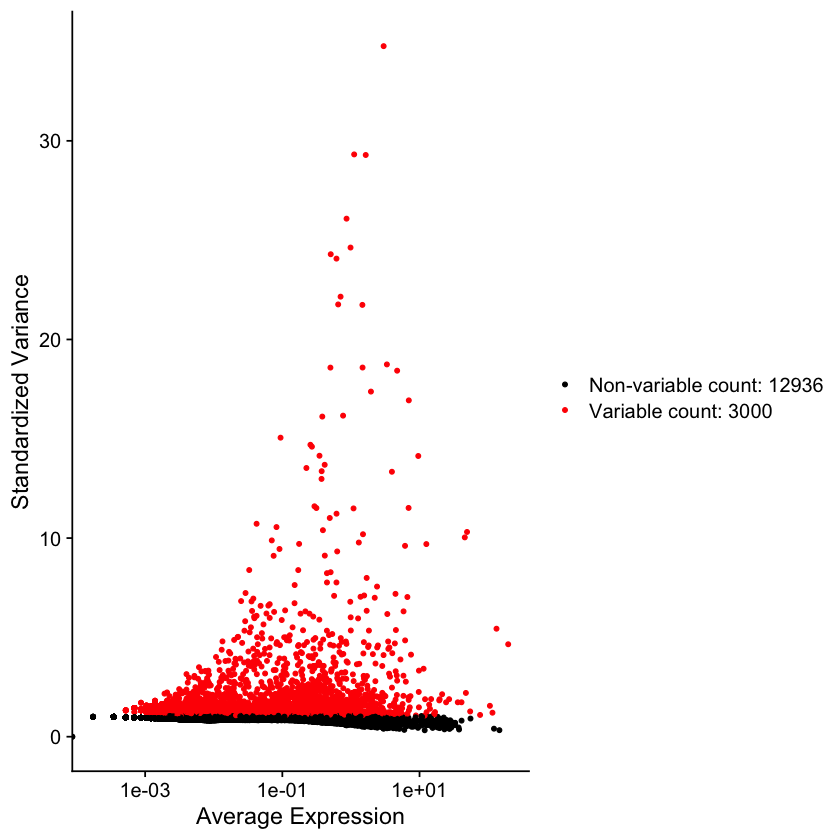

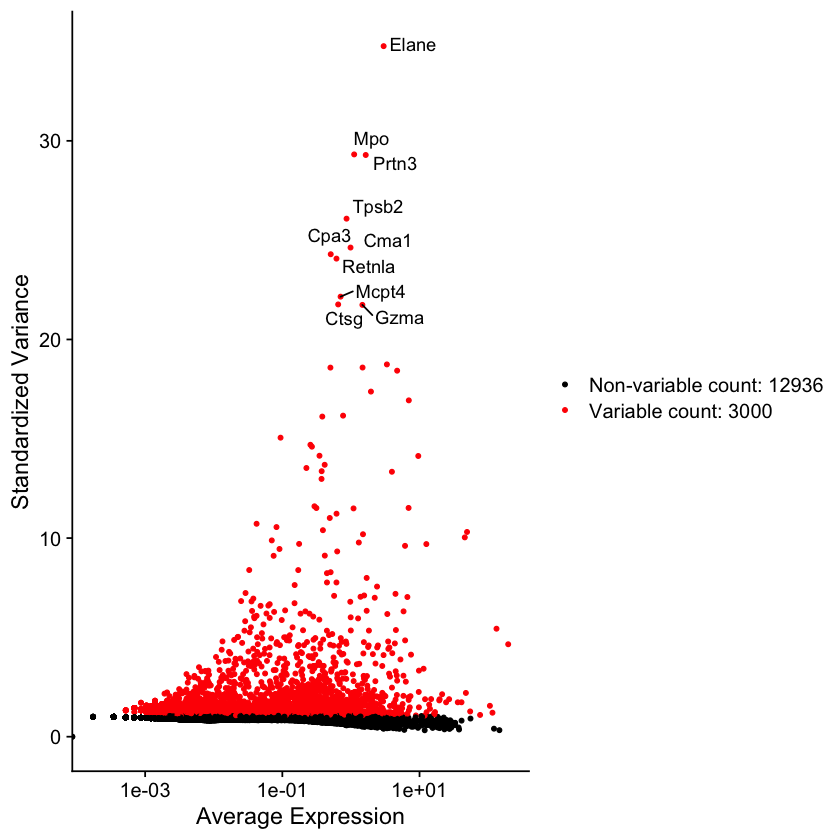

In [18]:
#Normalization
private_data_seurat <- NormalizeData(
  object = private_data_seurat,
  normalization_method = "LogNormalize",
  scale.factor = 10000
)

#identification of highly variable features
private_data_seurat <- FindVariableFeatures(
    private_data_seurat,
    selection.method = "vst",
    nfeatures = 3000)
private_top10 <- head(VariableFeatures(private_data_seurat), 10)

#plot variable features with or without labels
plot1 <- VariableFeaturePlot(private_data_seurat)
plot2 <- LabelPoints(
    plot = plot1, 
    points = private_top10,
    repel = TRUE)
plot1
plot2

Centering and scaling data matrix

PC_ 1 
Positive:  2810417H13Rik, Stmn1, Top2a, Hist1h2ap, Rrm2, H2afx, Ccna2, Hmgb2, Cks1b, Birc5 
	   Ezh2, Mki67, Lockd, Spc24, Cdca8, Cdca3, Smc2, Nusap1, Smc4, Dut 
	   Asf1b, Pbk, Ptma, Hmgb1, Hmgb3, Neil3, Cdk1, H2afz, H2afv, Cenpm 
Negative:  Apoe, Csf1r, Trf, C1qa, Sepp1, C1qc, C1qb, Lgmn, Ctss, Ctsb 
	   Ctsc, Aif1, Tmem176b, Ms4a7, Lyz2, Adgre1, Cst3, Dab2, Fcrls, Mrc1 
	   Pf4, Grn, Fcgrt, Timp2, Tmem176a, Gas6, Maf, Hpgd, Fcgr1, Stab1 
PC_ 2 
Positive:  Ppia, C1qc, Lgmn, Ptma, C1qb, C1qa, Prdx1, Sepp1, Dab2, Pf4 
	   Snx2, Fcrls, Ctsc, Ms4a7, Apoe, Ctsb, Mrc1, Trf, Aif1, Blvrb 
	   Jun, Tmem176b, Maf, Fcgrt, Gas6, Csf1r, Cbr2, Tuba1b, Stab1, Hmgn1 
Negative:  Ifitm6, Pglyrp1, Wfdc21, S100a8, S100a9, S100a11, Anxa1, Hp, Lcn2, Cd177 
	   Ly6g, Trem3, Lrg1, Ngp, Ltf, Mcemp1, Camp, Slpi, Gsr, Mmp8 
	   G0s2, Chil1, Chil3, Msrb1, Plaur, Hdc, Retnlg, AA467197, Gadd45a, Pygl 
PC_ 3 
Positive:  Tmsb10, Rpsa, Rps2, Rpl12, Klrd1, Rpl36a, Eef1g, Klrk

PC_ 1 
Positive:  2810417H13Rik, Stmn1, Top2a, Hist1h2ap, Rrm2 
Negative:  Apoe, Csf1r, Trf, C1qa, Sepp1 
PC_ 2 
Positive:  Ppia, C1qc, Lgmn, Ptma, C1qb 
Negative:  Ifitm6, Pglyrp1, Wfdc21, S100a8, S100a9 
PC_ 3 
Positive:  Tmsb10, Rpsa, Rps2, Rpl12, Klrd1 
Negative:  Cd63, Hmgn2, S100a8, Aldh2, S100a9 
PC_ 4 
Positive:  Gm2a, Lgals3, Napsa, H2-DMa, Plbd1 
Negative:  Nkg7, Gimap4, Lck, Ctsw, Il2rb 
PC_ 5 
Positive:  S100a4, Ccr2, Ms4a4b, Nkg7, Emb 
Negative:  Ccr9, Cox6a2, Siglech, D13Ertd608e, Cd300c 


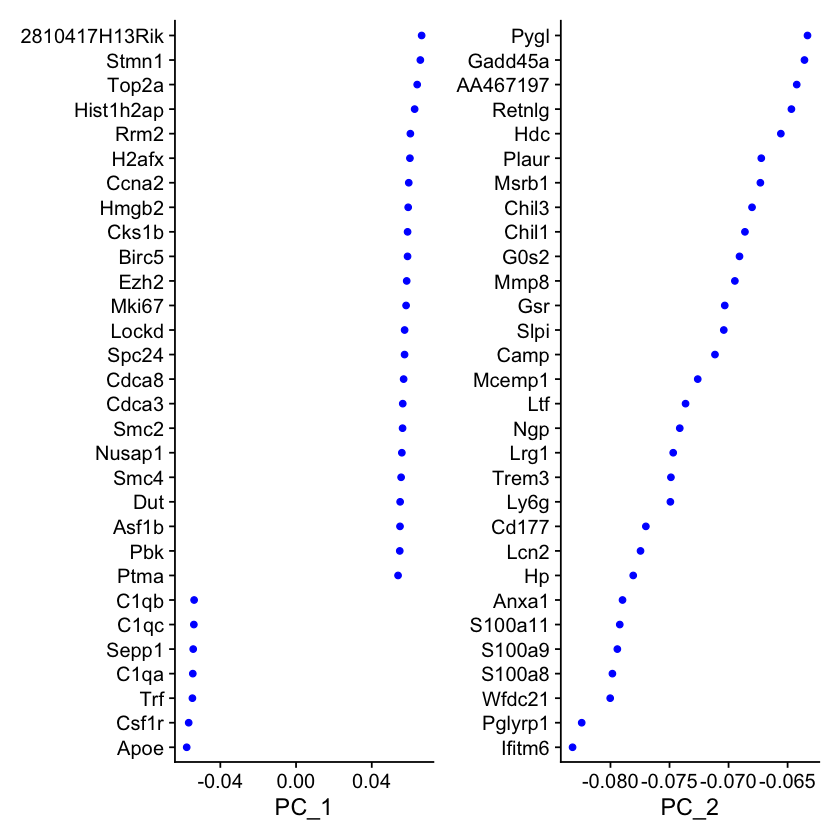

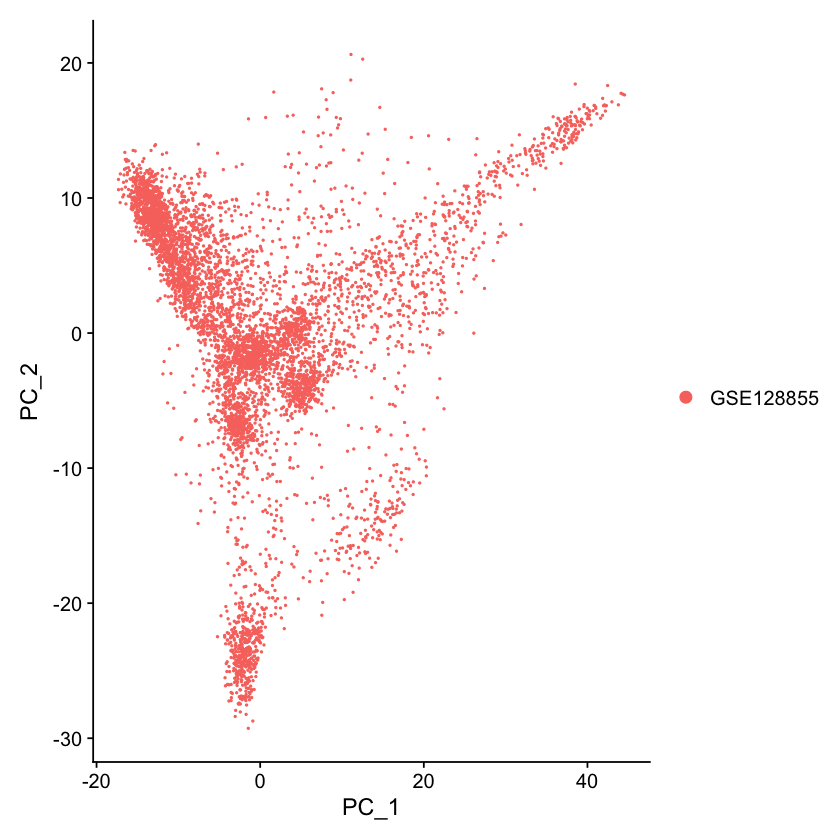

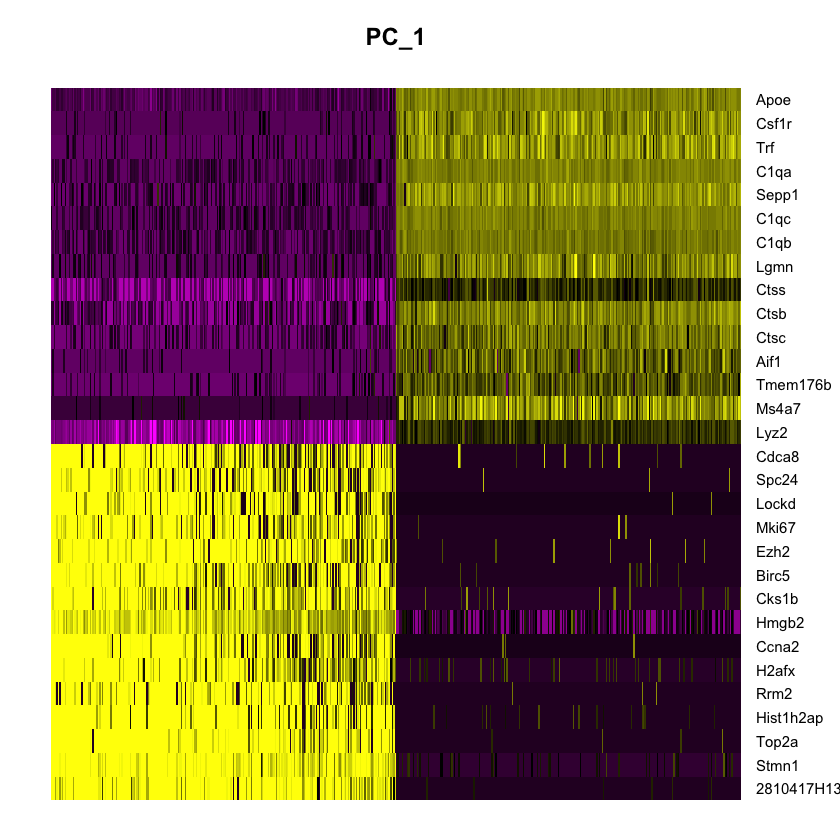

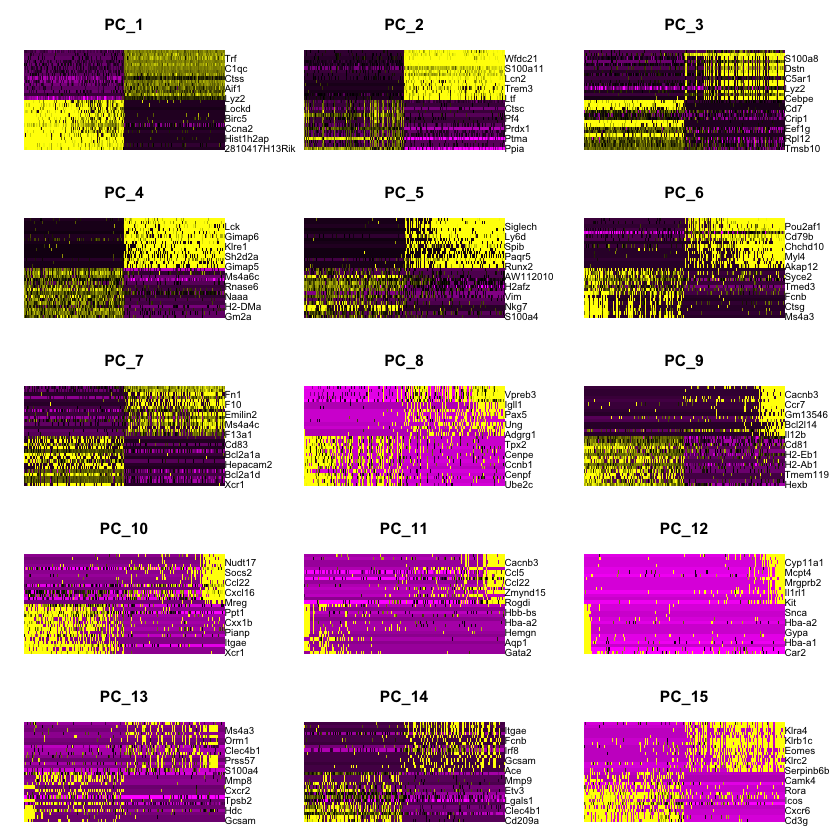

In [19]:
#Scaling data
private_all_genes <- rownames(private_data_seurat)
private_data_seurat <- ScaleData(private_data_seurat, features = private_all_genes)

#perform linear dimentional reduction
private_data_seurat <- RunPCA(private_data_seurat, features = VariableFeatures(object = private_data_seurat))
print(private_data_seurat[["pca"]], dims = 1:5, nfeatures = 5)
VizDimLoadings(private_data_seurat, dims = 1:2, reduction = "pca")
DimPlot(private_data_seurat, reduction = "pca")
DimHeatmap(private_data_seurat, dims = 1, cells = 500, balanced = TRUE)
DimHeatmap(private_data_seurat, dims = 1:15, cells = 500, balanced = TRUE)

Warning message:
“Removed 31500 rows containing missing values (geom_point).”


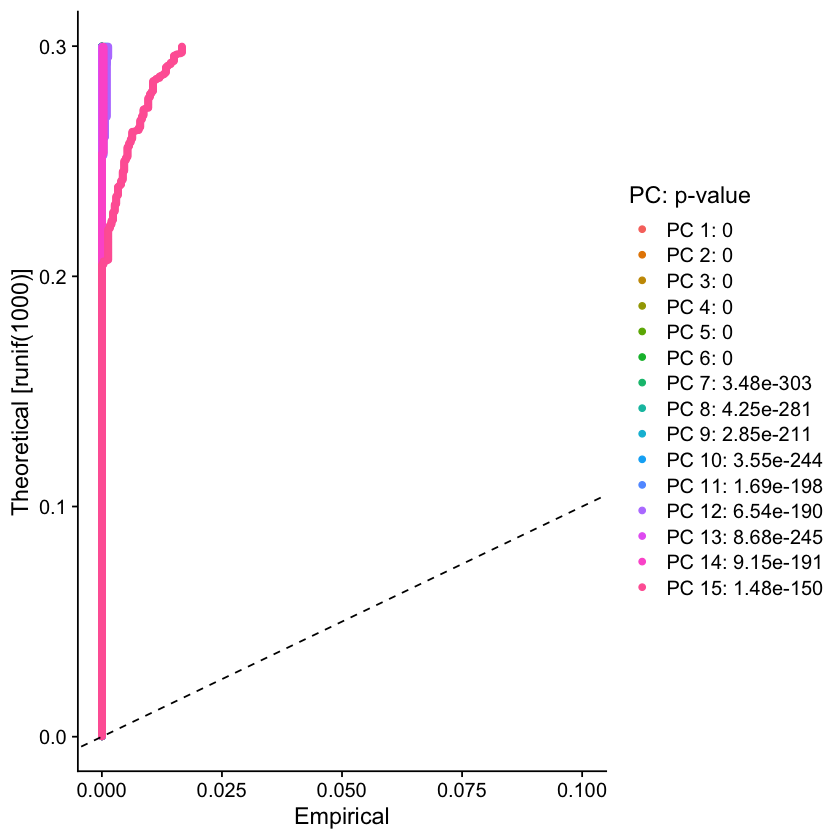

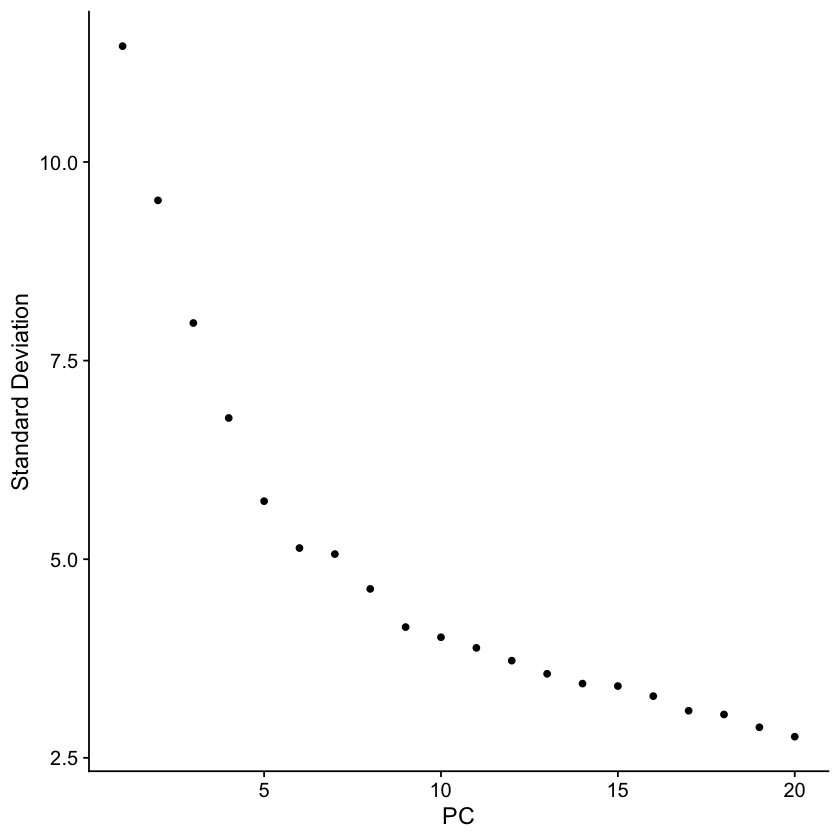

In [20]:
#determine the dimentionality of the  dataset  #takes time
private_data_seurat <- JackStraw(private_data_seurat, num.replicate = 100)
private_data_seurat <- ScoreJackStraw(private_data_seurat, dims = 1:20)
JackStrawPlot(private_data_seurat, dims = 1:15)
ElbowPlot(private_data_seurat)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5744
Number of edges: 180504

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9234
Number of communities: 16
Elapsed time: 0 seconds


17:55:42 UMAP embedding parameters a = 0.9922 b = 1.112

17:55:42 Read 5744 rows and found 10 numeric columns

17:55:42 Using Annoy for neighbor search, n_neighbors = 30

17:55:42 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

17:55:43 Writing NN index file to temp file /var/folders/q1/mmywyq3j2jb7dt3z_ttjz7t80000gn/T//RtmprXgEfF/file13a1e76a5de8d

17:55:43 Searching Annoy index using 1 thread, search_k = 3000

17:55:45 Annoy recall = 100%

17:55:46 Commencing smooth kNN distance calibration using 1 thread

17:55:46 Initializing from normalized Laplacian + noise

17:55:47 Commencing optimization for 500 epochs, with 230362 positive edges

17:55:56 Optimization finished



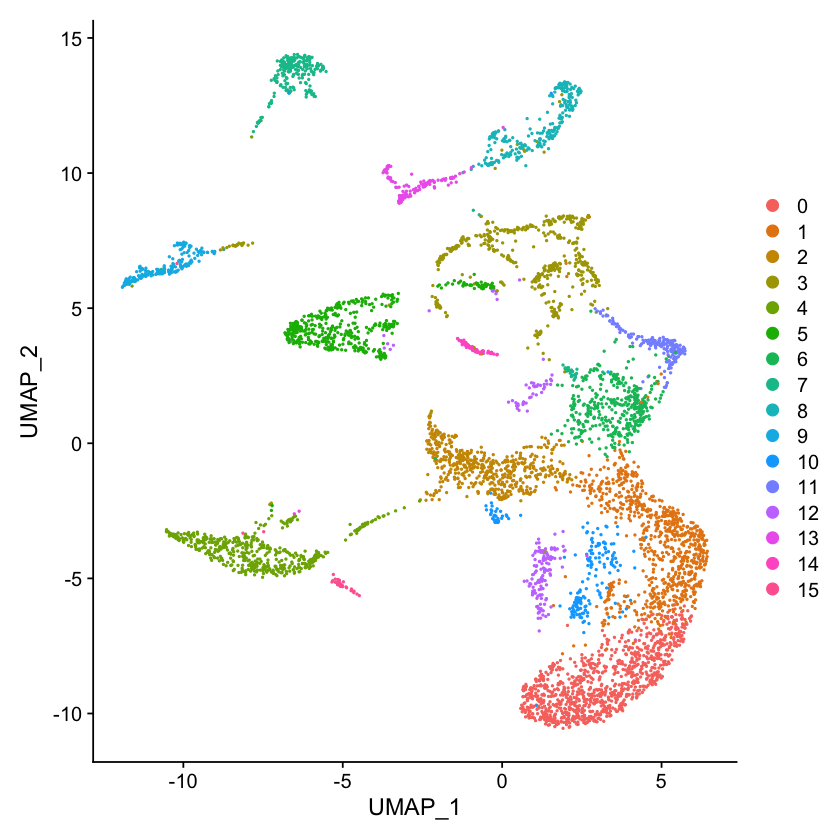

In [21]:
#Cluster the cells
private_data_seurat  <- FindNeighbors(private_data_seurat, dims = 1:10)
private_data_seurat  <- FindClusters(private_data_seurat, resolution = 0.5)

#Run non-linear dimentional reduction (UMAP)
private_data_seurat <- RunUMAP(private_data_seurat, dims = 1:10)
DimPlot(private_data_seurat, reduction = "umap")

In [22]:
#Find differentially expressed features (cluster biomarkers)
private_data_seurat_markers <- FindAllMarkers(private_data_seurat, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
private_top2 <- private_data_seurat_markers %>>%
group_by(cluster) %>>%
top_n(n = 2, wt = avg_logFC)
private_top2

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15



p_val         avg_logFC pct.1 pct.2 p_val_adj     cluster gene     
1   0.000000e+00 2.2303804 0.996 0.379  0.000000e+00 0       Pf4      
2  2.651243e-280 2.4869531 0.730 0.262 4.225021e-276 0       Ccl8     
3  8.057197e-245 1.3446888 0.980 0.809 1.283995e-240 1       H2-Eb1   
4  1.174102e-202 1.3080219 0.928 0.625 1.871049e-198 1       Hexb     
5  3.053447e-295 2.1115820 0.998 0.627 4.865974e-291 2       Plac8    
6  1.394097e-169 1.5910775 0.913 0.526 2.221632e-165 2       Ly6c2    
7   1.056669e-86 1.7888197 0.408 0.112  1.683908e-82 3       Prtn3    
8   1.965558e-46 1.9223544 0.375 0.142  3.132313e-42 3       Elane    
9  1.806502e-294 3.2324254 1.000 0.991 2.878841e-290 4       S100a8   
10 2.591945e-257 3.8105397 0.968 0.535 4.130523e-253 4       Retnlg   
11 4.628090e-176 2.8180843 0.842 0.412 7.375324e-172 5       Ccl5     
12 7.503627e-142 3.3254659 0.457 0.090 1.195778e-137 5       Gzma     
13  0.000000e+00 2.4837149 0.855 0.134  0.000000e+00 6       Cd209a   
14 2.669864e-248 1.6240508 0.729 0.122 4.254695e-244 6       Tnip3    
15  0.000000e+00 2.5649038 0.845 0.040  0.000000e+00 7       Cox6a2   
16  0.000000e+00 2.4940855 0.922 0.094  0.000000e+00 7       Siglech  
17  0.000000e+00 2.7025021 0.996 0.160  0.000000e+00 8       Vpreb3   
18 1.434579e-204 2.5038888 0.896 0.193 2.286145e-200 8       Hist1h2ap
19 7.971228e-143 2.5301727 0.990 0.351 1.270295e-138 9       Chil3    
20 1.566981e-111 2.6461301 1.000 0.809 2.497140e-107 9       Camp     
21 1.001095e-223 1.3647073 0.784 0.081 1.595344e-219 10      Ms4a1    
22 3.681966e-157 1.4824250 0.995 0.232 5.867581e-153 10      Cd79a    
23 1.559326e-151 1.9120027 1.000 0.349 2.484942e-147 11      Naaa     
24 9.036528e-119 1.7617651 1.000 0.980 1.440061e-114 11      Cst3     
25 7.115520e-155 1.0191729 0.648 0.072 1.133929e-150 12      Cd3g     
26 6.349820e-104 0.8683976 0.863 0.210  1.011907e-99 12      Nkg7     
27 6.932842e-142 2.3628368 0.725 0.090 1.104818e-137 13      Ms4a1    
28 1.908038e-123 2.4222710 0.969 0.241 3.040650e-119 13      Cd79a    
29 7.608389e-216 3.0539286 0.855 0.043 1.212473e-211 14      Fscn1    
30 1.978952e-175 3.1755062 0.986 0.079 3.153658e-171 14      Ccr7     
31  1.129056e-21 1.4204735 0.871 0.217  1.799264e-17 15      G0s2     
32  4.249791e-17 1.8131370 1.000 0.571  6.772467e-13 15      Retnlg

### 入力

In [23]:
private_Cluster_FocusOn <- 1

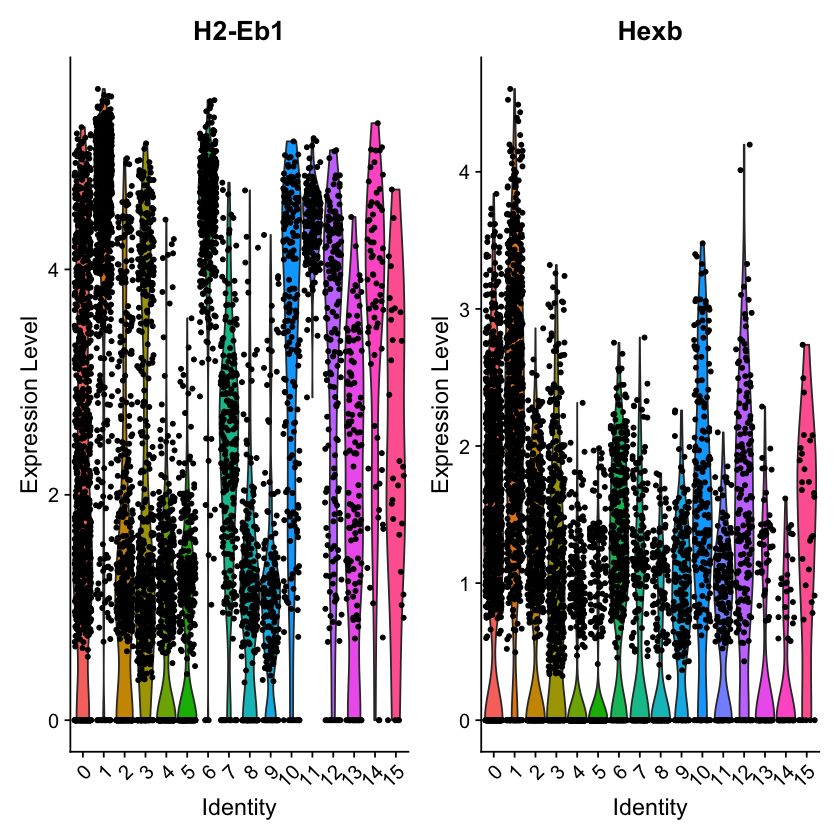

In [24]:
VlnPlot(private_data_seurat, features = subset(private_top2, cluster == private_Cluster_FocusOn)$gene)

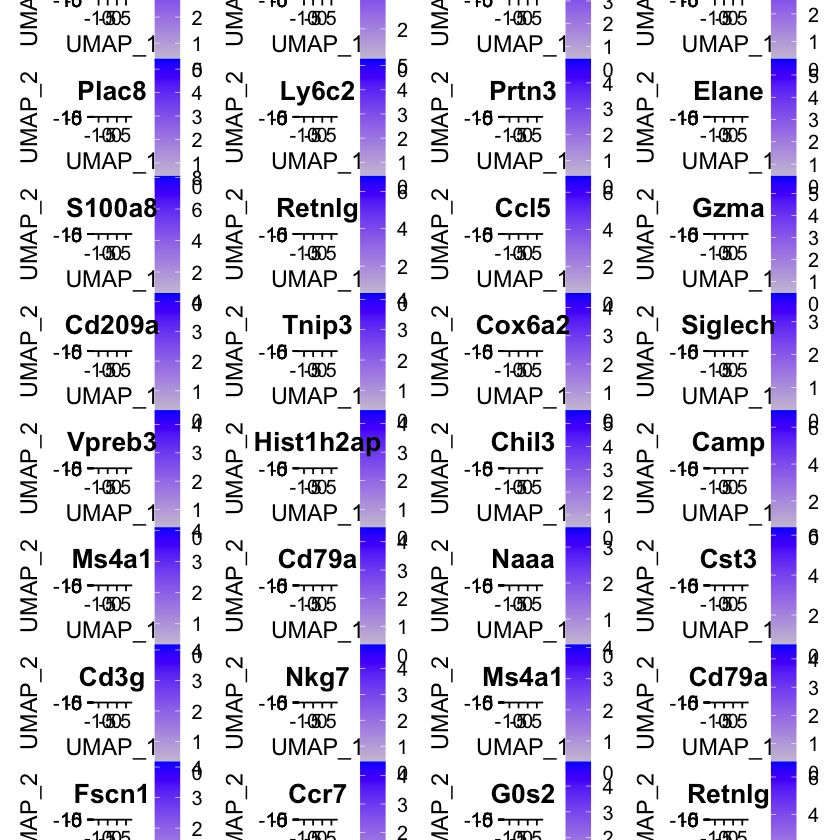

In [25]:
#feature plot for each marker
FeaturePlot(private_data_seurat, features = private_top2$gene)

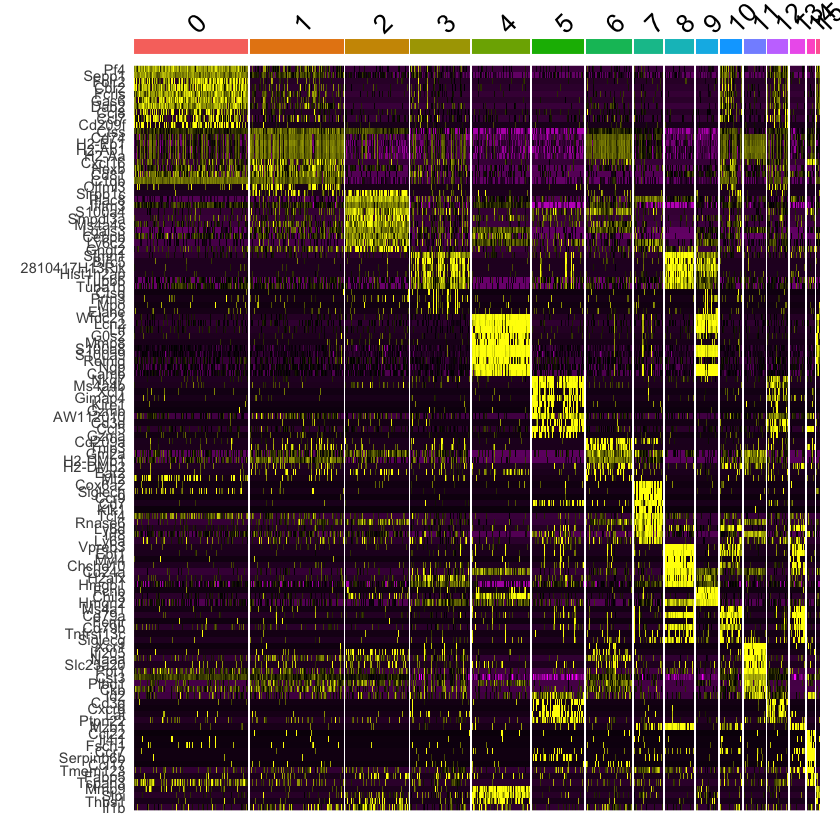

In [26]:
#Heatmaps for featured genes
private_top10 <- private_data_seurat_markers %>>%
group_by(cluster) %>>%
top_n(n = 10, wt = avg_logFC)
DoHeatmap(private_data_seurat, features = private_top10$gene) + NoLegend()

## 5. Integration

In [27]:
integ_list <- list(public_data_seurat, private_data_seurat)
names(integ_list) <- c("GSM3442006", "GSM3687213")
anchors <- FindIntegrationAnchors(object.list = integ_list, dims = 1:30, reduction = "cca")
integ_data <- IntegrateData(anchorset = anchors, dims = 1:30)
DefaultAssay(integ_data) <- "integrated"

Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 9362 anchors

Filtering anchors

	Retained 1010 anchors

Extracting within-dataset neighbors

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Warning message:
“Adding a command log without an assay associated with it”


## 6. Clustering

In [28]:
integ_data <- ScaleData(integ_data)
integ_data <- RunPCA(integ_data , npcs = 30)
integ_data <- RunUMAP(integ_data, reduction = "pca", dims = 1:5)
integ_data <- FindNeighbors(integ_data, reduction = "pca", dims = 1:5)
integ_data <- FindClusters(integ_data, resolution = 0.5)

Centering and scaling data matrix

PC_ 1 
Positive:  Apoe, C1qa, C1qc, C1qb, Sepp1, Ftl1, Lgmn, Ms4a7, Ctsb, Trf 
	   Pf4, Mrc1, Ctsc, Fcrls, Dab2, Cst3, Fth1, Timp2, Tmem176b, Stab1 
	   Folr2, Fcgrt, Pltp, Jun, Ctsd, Maf, Fos, Smagp, Pmp22, Tmem176a 
Negative:  Hmgb2, Tmsb10, Cd24a, Ptprcap, Stmn1, Lmnb1, H2afx, H2afz, Top2a, Cks2 
	   Chchd10, Ccna2, Lockd, Ube2s, Myb, Hmgn2, Rrm2, Ezh2, Ccnd3, Dut 
	   S100a11, Mki67, Smc4, Anp32b, Plac8, Uhrf1, Ebf1, Nusap1, Cdca8, Smc2 
PC_ 2 
Positive:  Tuba1b, Stmn1, Birc5, Tubb5, Hmgb1, Top2a, Ptma, Mki67, Nusap1, Spc24 
	   Neil3, Cdk1, Pf4, Tpx2, Smc2, Prc1, Cks1b, H2afx, C1qc, Cdca8 
	   Smc4, Kif22, Ube2s, C1qb, C1qa, Ube2c, Lockd, Cenpf, Aurkb, Fcrls 
Negative:  Ifitm6, S100a11, S100a6, Mcemp1, Hp, Pglyrp1, Anxa1, Plaur, S100a8, Slpi 
	   Mmp8, Lgals3, Trem3, Gsr, Msrb1, Anxa2, Ly6c2, G0s2, Slc7a11, Lsp1 
	   Pygl, Fpr2, Chil1, Mgst1, Ltb4r1, Trem1, Thbs1, Gadd45a, Mxd1, Adam8 
PC_ 3 
Positive:  Ptprcap, Rps2, Gimap6, Gimap1, AW112010, Ct

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8376
Number of edges: 248853

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9130
Number of communities: 15
Elapsed time: 1 seconds


## 7. Visualization

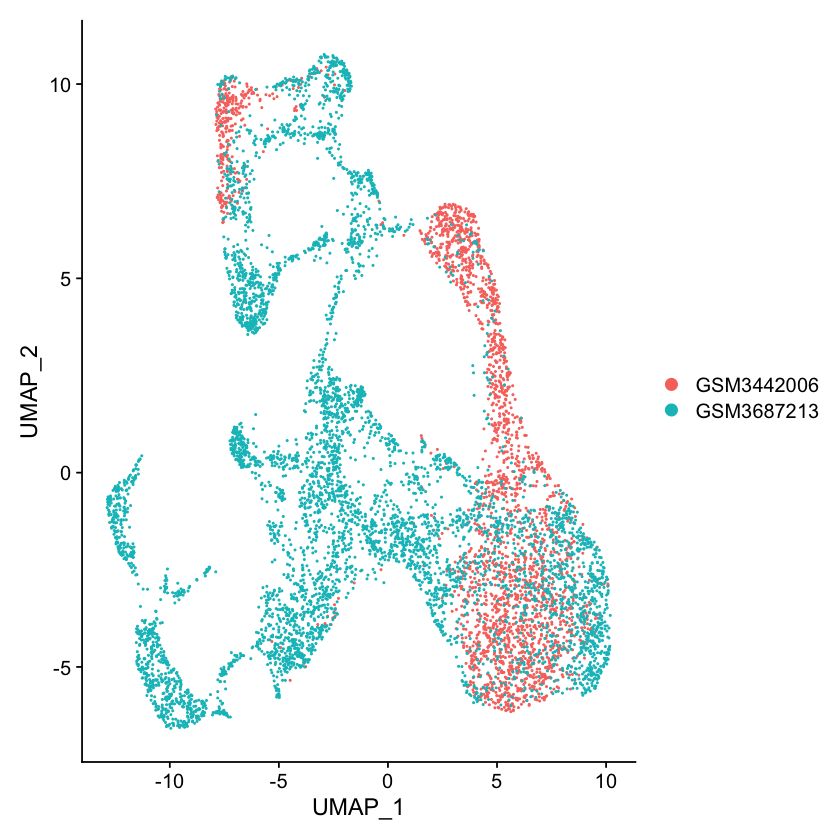

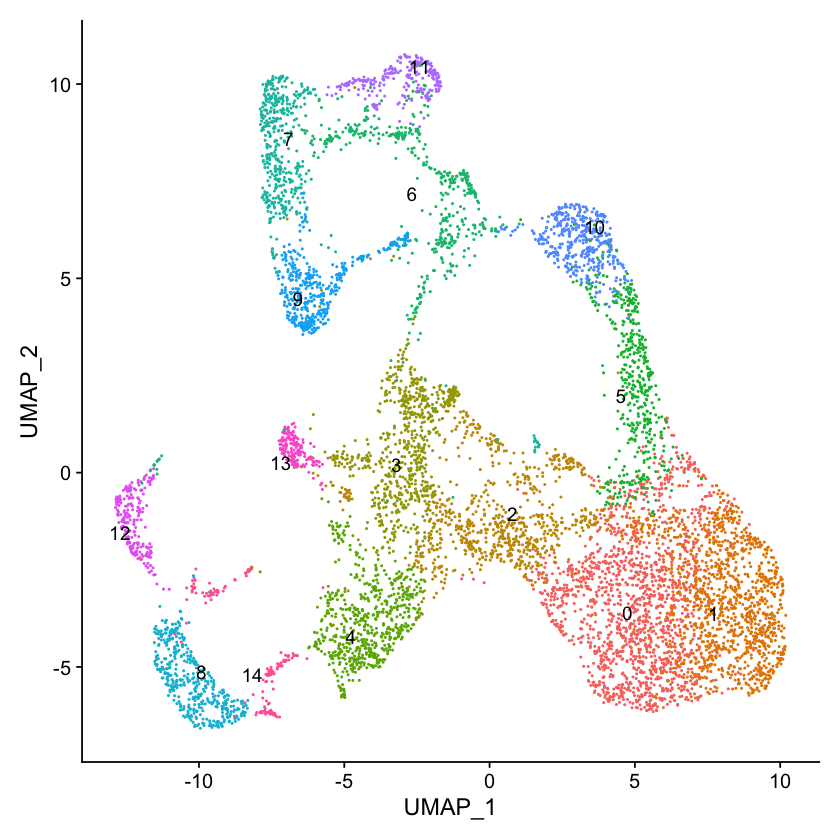

In [29]:
p1 <- DimPlot(integ_data, reduction = "umap", group.by = "sample")
plot(p1)
p2 <- DimPlot(
  integ_data,
  reduction = "umap",
  label = TRUE,
  repel = TRUE) + NoLegend()
plot(p2)